# Buildmodel

Build nonlinear time series models from scalar time series data using minimum description length radila basis function formalism

## Sample data

First we generate some typical test data to play with

In [1]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [2]:
using Plots

In [3]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

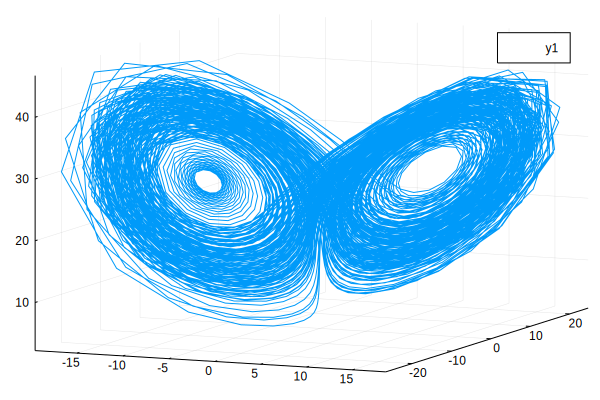

In [4]:
plot(z[1,:],z[2,:],z[3,:])

In [5]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

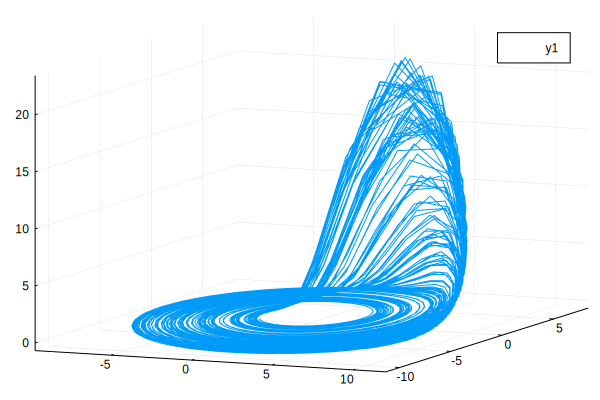

In [6]:
plot(z[1,:],z[2,:],z[3,:])

In [7]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

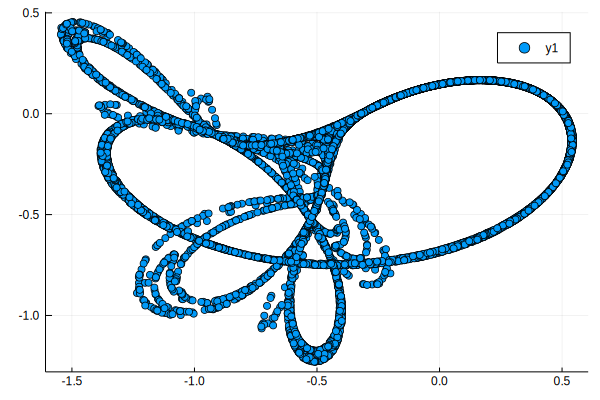

In [8]:
plot(z[2,:],z[1,:],linetype=:dots)

In [9]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.0617865  -0.0141417   0.10428   …  -0.0712685  -0.427198  -0.133814
 -0.407923   -0.318371   -0.156912     -0.985774   -0.496638  -0.665768

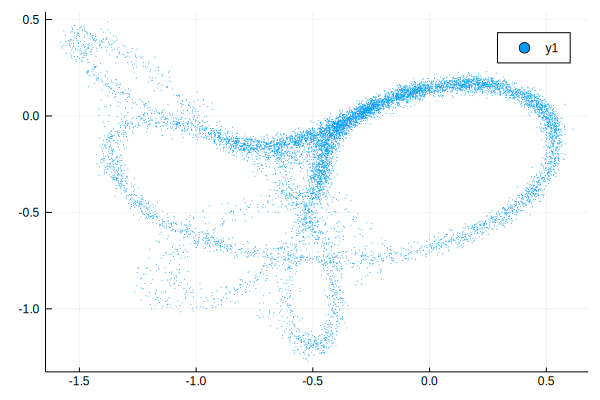

In [10]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

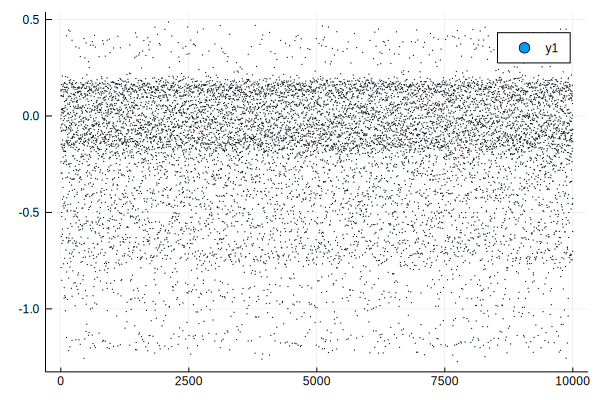

In [11]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [12]:
z=itmap(logistic,1/π,10^4);

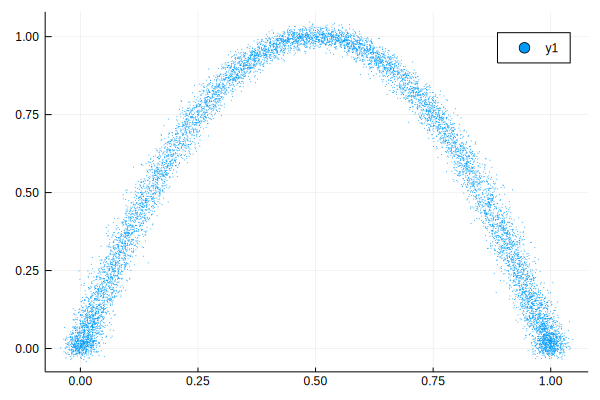

In [13]:
z=itmap(logistic,1/π,10^4);
zn=addnoise(z,0.05)
plot(zn[1:end-1],zn[2:end],linetype=:dots,markersize=0.1)

## Build the model

Import the modelling code, and away we go.

In [14]:
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

Any valid inline function can be used as a penlaty function (it must operate on globally defined functions in `Place.topdown` and must return a scalar, the algorithm seeks a minimum of this function. Four useful examples follow (description length ala `Rissanen` requires extra computation in the main code to account for parameter precisions.

In [15]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

Next, the dictionary `options` defined model structure and optional modelling parameters (it'll run a produce something even if `options` is empty, but it might be better to populate this somewhat intelligently. A useful example to model the (admittedly rather simple) logistic map is provided

In [16]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

And, then, away we go...

In [17]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=4, nx=7999
needδ=true
*MSS=0.12393213321336354 DL=3003.53909061358 size=1
*MSS=0.11066266621517777 DL=2551.524893138051 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.0789817548171166 DL=1207.5988219861858 size=2
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
MSS=0.10810031426607093 DL=2463.2121298446414 size=2
*MSS=0.04937312220019311 DL=-666.1261994885521 size=3
MSS=0.06665125432591054 DL=535.1816301483728 size=3
*MSS=0.038108174149366035 DL=-1694.0839939895532 size=4
*MSS=0.033860712145961966 DL=-2161.561521127529 size=5
*MSS=0.0323243754307173 DL=-2341.080503914132 size=6
*MSS=0.03132484398612647 DL=-2465.2094384791794 size=6
*MSS=0.019664025490299705 DL=-4327.423489453726 size=6
*MSS=0.016530823449189484 DL=-5019.885835793313 size=6
MSS=0.018155820323658572 DL=-4643.92579791016 size=6
*MSS=0.014521900886612945 DL=-5530.79820752908 size=7
*MSS=0.013688675294961056 DL=-5760.725995528104 size=8
MSS=0.014943849109909707 DL=-5408.68356353379

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0, 2], 0.650364746196429, [0.6561663650740558 0.3006810385449434 … 0.3032956496469478 0.6862481753880849; 0.28388448285798257 0.629627779455732 … 0.6225143224062263 0.7388191969352729], [4.810250791894481]), Main.Place.BasisFunc(tophat, [0, 2, 3], 0.815416185268441, [0.6561663650740558 0.3006810385449434 … 0.3032956496469478 0.6862481753880849; 0.28388448285798257 0.629627779455732 … 0.6225143224062263 0.7388191969352729; 0.918065755540036 0.7892600156512736 … 0.1799425412578898 0.21944875493118957], [4.544266166665985]), Main.Place.BasisFunc(tophat, [0, 3], 0.707419293743563, [0.6561663650740558 0.3006810385449434 … 0.3032956496469478 0.6862481753880849; 0.918065755540036 0.7892600156512736 … 0.1799425412578898 0.21944875493118957], [4.723563995532159]), Main.Place.BasisFunc(tophat, [2, 3], 0.8269086135473128, [0.28388448285798257 0.629627779455732 … 0.6225143224062263 0.7388191969352729; 0.918065755540036 0.789

Modelling done, we can make one-step predictions on time series data

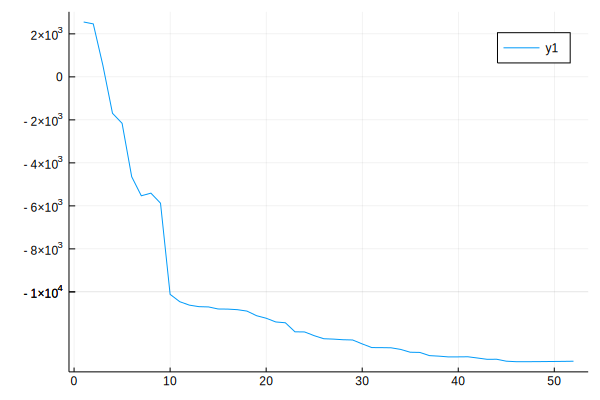

In [18]:
plot(mdlv)

In [19]:
yt,yp,ep = Place.predict(mymodel, z);

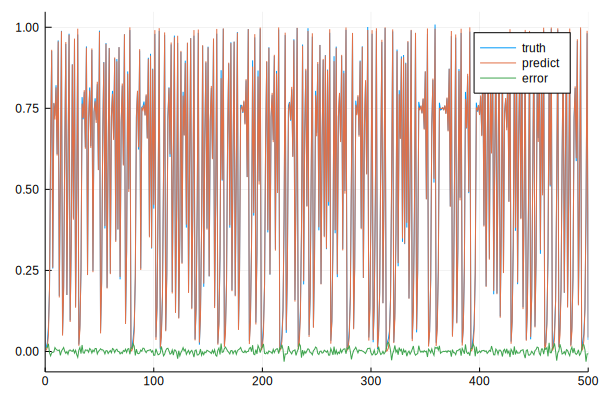

In [20]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

Or, free run simulations

In [21]:
yp, yt = Place.freerun(mymodel,zn,500)

([0.026277259301260347, 0.10154546611880028, 0.3582398844012235, 0.9277579727901454, 0.2736418663637716, 0.8100959511678902, 0.6322023596191175, 0.9374079251501546, 0.22958892027828, 0.7069804928105652  …  -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515, -0.504888710235515], [0.0002917646928295532, 0.006815181882852115, 0.03667429357972339, 0.17519621345843006, 0.6235617315740061, 0.9319585170380706, 0.28882278803638256, 0.774300003734774, 0.7188907816888686, 0.8348144226076153  …  0.13081020533880128, 0.4938561264192789, 1.0394476283367027, 0.005973688487808635, 0.02284078014234342, 0.03817905318314615, 0.11778023037823944, 0.43221610806657823, 0.9895620425818717, 0.0380747622510419])

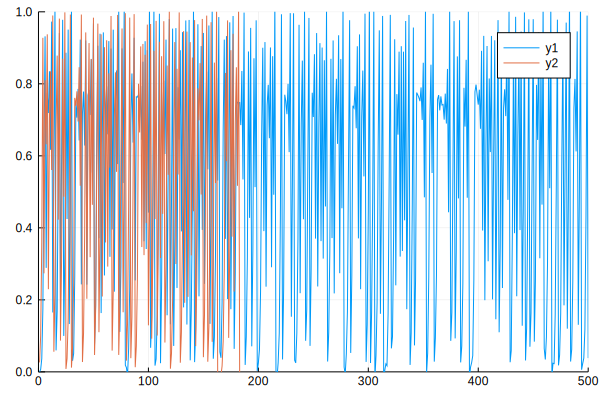

In [22]:
plot(yt)
plot!(yp,ylimit=(0,1),xlimit=(0,500))


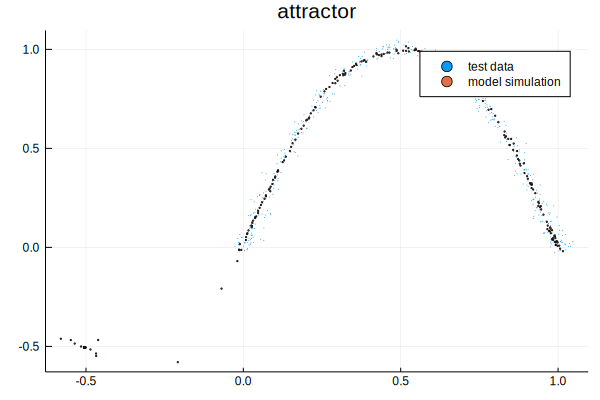

In [23]:
plot(yt[1:end-1],yt[2:end],linetype=:dots,markersize=0.1,label="test data")
plot!(yp[1:end-1],yp[2:end],linetype=:dots,markersize=1,label="model simulation",title="attractor")

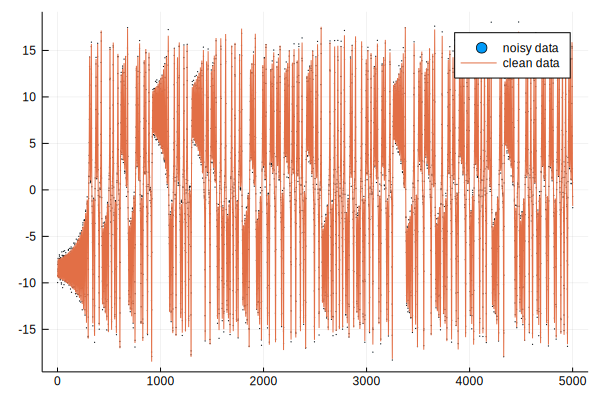

In [24]:
z=lorenzpoints(5000,0.05)
y=z[1,:]
yn=addnoise(y,0.05)
plot(yn,linetype=:dots,markersize=0.5,label="noisy data")
plot!(y,label="clean data")

In [25]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3,6,12]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

In [26]:
mymodel, X, zout, mdlv = Place.buildmodel(yn,options)

dx=13, nx=4488
needδ=true
*MSS=4.586863173965285 DL=9790.239771384126 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.0272109118599264 DL=8862.74579129671 size=2
*MSS=2.6998135042058586 DL=8611.572535379162 size=3
*MSS=2.6442390100339845 DL=8570.198154358304 size=4
*MSS=1.5991624011988013 DL=7443.373700511669 size=4
*MSS=1.5977839894349124 DL=7441.513928622114 size=4
MSS=1.5957716734065268 DL=7444.708084523979 size=5
*MSS=1.5513645620968872 DL=7379.703319877049 size=5
*MSS=1.5453831389327344 DL=7376.690279062051 size=6
*MSS=1.5419818095206421 DL=7371.729548501621 size=6
*MSS=1.4994755792420347 DL=7307.443356921551 size=6
MSS=1.496920491771017 DL=7310.186631187646 size=7
*MSS=1.3948737069057575 DL=7148.299588797664 size=7
MSS=1.3934847784307824 DL=7152.604780588432 size=8
*MSS=0.9218377234629666 DL=6231.008435365695 size=8
*MSS=0.9122506072978346 DL=6214.3903168479565 size=9
MSS=0.9105763912815041 DL=6216.5504286290625 size=10
*MSS=0.9038891916611738 DL=6198.7

MSS=0.3311913934643386 DL=4313.5707183045715 size=73
MSS=0.3306671841494773 DL=4307.025609985481 size=73
MSS=0.3306551254522723 DL=4313.772582478472 size=74
MSS=0.33017268354090246 DL=4309.6086267489 size=74


(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0], 16.251407102265382, [3.4178391409133684 13.335174119936974 … -6.703656040929042 10.913285825143502], [3.565964702931412]), Main.Place.BasisFunc(tophat, [0, 3], 12.152993960707533, [3.4178391409133684 13.335174119936974 … -6.703656040929042 10.913285825143502; 0.9269876785097821 9.944102336515499 … -1.527846489954371 2.6514536059363945], [4.8558002988402045]), Main.Place.BasisFunc(gaussian, [3, 6], 3.921234042546936, [0.9269876785097821 9.944102336515499 … -1.527846489954371 2.6514536059363945; -0.2211695020962053 3.5510032038741945 … -0.6478712409558287 0.5848826924343065], Any[]), Main.Place.BasisFunc(tophat, [1, 2, 6], 12.367389417012996, [2.112907543032959 15.153090679826168 … -3.912970644125423 6.792755260669175; 1.202049089218452 13.001335603149982 … -1.860207704994541 4.987299804942357; -0.2211695020962053 3.5510032038741945 … -0.6478712409558287 0.5848826924343065], [4.818504951328407]), Main.Place.Bas

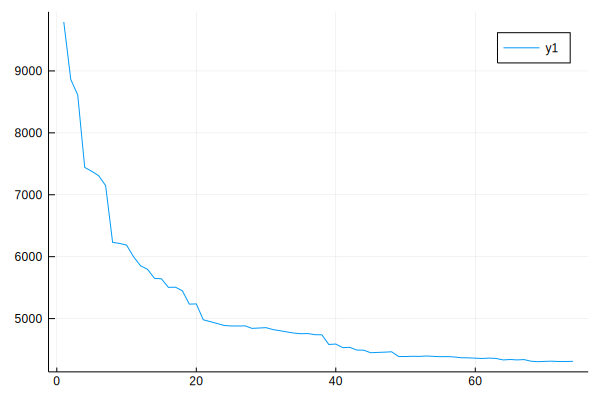

In [27]:
plot(mdlv)

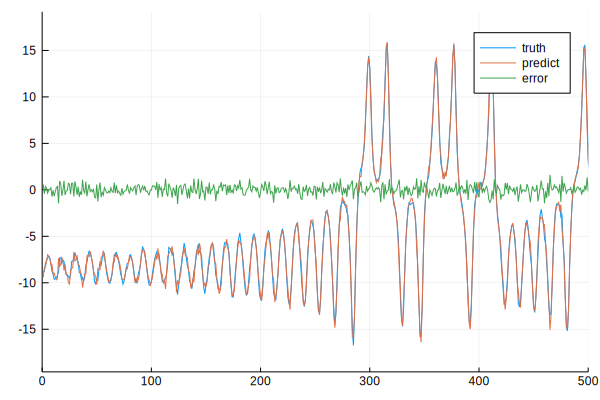

In [28]:
yt,yp,ep = Place.predict(mymodel, yn);
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

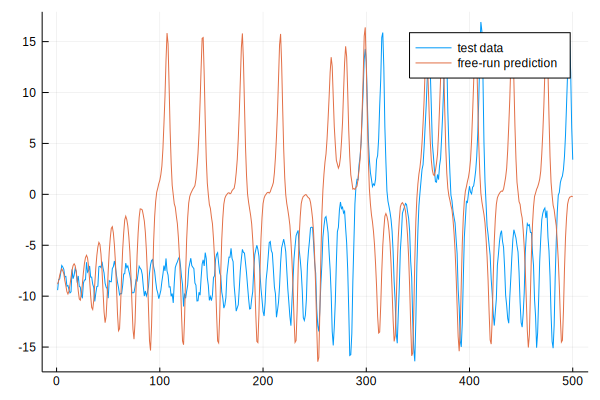

In [29]:
yp, yt = Place.freerun(mymodel,yn,500)
plot(yt,label="test data")
plot!(yp,label="free-run prediction")

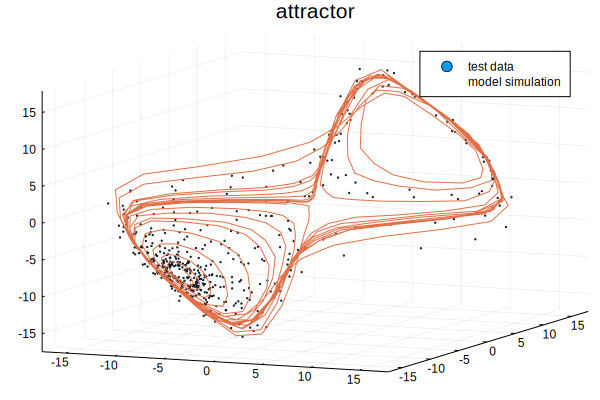

In [30]:
plot(yt[1:end-6],yt[4:end-3],yt[7:end],linetype=:dots,markersize=1,label="test data")
plot!(yp[1:end-6],yp[4:end-3],yp[7:end],label="model simulation",title="attractor")

## Michael Small

Last updated 12/7